## 상권 분석 머신러닝

1. 데이터 합산 및 전처리

In [1]:
# 상권변화지표
import pandas as pd
income = pd.read_csv('서울시 우리마을가게 상권분석서비스(상권-소득소비).csv', encoding='cp949')
popular = pd.read_csv('서울시 우리마을가게 상권분석서비스(상권-생활인구).csv', encoding='cp949')
apart = pd.read_csv('서울시 우리마을가게 상권분석서비스(상권-아파트).csv', encoding='cp949')
change = pd.read_csv('서울시 우리마을가게 상권분석서비스(상권-상권변화지표).csv')
place = pd.read_csv('서울시 우리마을가게 상권분석서비스(상권-점포).csv', encoding='cp949')
sales2022 = pd.read_csv('서울시 우리마을가게 상권분석서비스(상권-추정매출)_2022년.csv', encoding='cp949')
sales2021 = pd.read_csv('서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2021년.csv')
sales2020 = pd.read_csv('서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2020년.csv')
public = pd.read_csv('서울시 우리마을가게 상권분석서비스(상권-집객시설).csv', encoding='cp949')
office = pd.read_csv('서울시 우리마을가게 상권분석서비스(상권-직장인구).csv', encoding='cp949')

In [2]:
income_df = income.query('기준_년_코드 in [2021, 2020]')\
[['기준_년_코드', '기준_분기_코드', '상권_코드', '월_평균_소득_금액']]
income_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13040 entries, 3260 to 16299
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기준_년_코드     13040 non-null  int64  
 1   기준_분기_코드    13040 non-null  int64  
 2   상권_코드       13040 non-null  int64  
 3   월_평균_소득_금액  12960 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 509.4 KB


In [3]:
popular_df = popular.rename({'기준 년코드' : '기준_년_코드'}, axis = 1)
popular_df = popular_df.query('기준_년_코드 in [2021, 2020]')\
[['기준_년_코드', '기준_분기_코드', '상권_코드', '총_생활인구_수']]
popular_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13346 entries, 3336 to 16681
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   기준_년_코드   13346 non-null  int64
 1   기준_분기_코드  13346 non-null  int64
 2   상권_코드     13346 non-null  int64
 3   총_생활인구_수  13346 non-null  int64
dtypes: int64(4)
memory usage: 521.3 KB


In [4]:
apart_df = apart.query('기준_년_코드 in [2021, 2020]')\
[['기준_년_코드', '기준_분기_코드', '상권_코드', '아파트_평균_시가']]
apart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11785 entries, 2966 to 14750
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   기준_년_코드    11785 non-null  int64
 1   기준_분기_코드   11785 non-null  int64
 2   상권_코드      11785 non-null  int64
 3   아파트_평균_시가  11785 non-null  int64
dtypes: int64(4)
memory usage: 460.4 KB


In [5]:
change_df = change.query('기준_년_코드 in [2021, 2020]')\
[['기준_년_코드', '기준_분기_코드', '상권_코드', '운영_영업_개월_평균', '폐업_영업_개월_평균']]
change_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13344 entries, 0 to 13343
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   기준_년_코드      13344 non-null  int64
 1   기준_분기_코드     13344 non-null  int64
 2   상권_코드        13344 non-null  int64
 3   운영_영업_개월_평균  13344 non-null  int64
 4   폐업_영업_개월_평균  13344 non-null  int64
dtypes: int64(5)
memory usage: 625.5 KB


In [6]:
sales2021_df = sales2021.query('서비스_업종_코드_명 == "제과점"')\
[['기준_년_코드', '기준_분기_코드', '상권_코드', '분기당_매출_금액', '점포수']]
sales2021_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935 entries, 13 to 140799
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   기준_년_코드    2935 non-null   int64  
 1   기준_분기_코드   2935 non-null   int64  
 2   상권_코드      2935 non-null   int64  
 3   분기당_매출_금액  2935 non-null   float64
 4   점포수        2935 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 137.6 KB


In [7]:
sales2020_df = sales2020.query('서비스_업종_코드_명 == "제과점"')\
[['기준_년_코드', '기준_분기_코드', '상권_코드', '분기당_매출_금액', '점포수']]
sales2020_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3020 entries, 13 to 144719
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   기준_년_코드    3020 non-null   int64  
 1   기준_분기_코드   3020 non-null   int64  
 2   상권_코드      3020 non-null   int64  
 3   분기당_매출_금액  3020 non-null   float64
 4   점포수        3020 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 141.6 KB


In [8]:
public_df = public.query('기준_년_코드 in [2021, 2020]')\
[['기준_년_코드', '기준_분기_코드', '상권_코드', '집객시설_수']]
public_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12702 entries, 3150 to 15851
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   기준_년_코드   12702 non-null  int64
 1   기준_분기_코드  12702 non-null  int64
 2   상권_코드     12702 non-null  int64
 3   집객시설_수    12702 non-null  int64
dtypes: int64(4)
memory usage: 496.2 KB


In [9]:
office = office.rename({'기준_년월_코드' : '기준_년_코드'}, axis = 1)
office_df = office.query('기준_년_코드 in [2021, 2020]')\
[['기준_년_코드', '기준_분기_코드', '상권_코드', '총_직장_인구_수', '남성_직장_인구_수', '여성_직장_인구_수']]
office_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13040 entries, 3260 to 16299
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   기준_년_코드     13040 non-null  int64
 1   기준_분기_코드    13040 non-null  int64
 2   상권_코드       13040 non-null  int64
 3   총_직장_인구_수   13040 non-null  int64
 4   남성_직장_인구_수  13040 non-null  int64
 5   여성_직장_인구_수  13040 non-null  int64
dtypes: int64(6)
memory usage: 713.1 KB


In [10]:
sales2021_df['매출_금액/점포수'] = sales2021_df['분기당_매출_금액']/sales2021_df['점포수']
sales2020_df['매출_금액/점포수'] = sales2020_df['분기당_매출_금액']/sales2020_df['점포수']

In [11]:
sales_df = pd.concat([sales2020_df, sales2021_df], axis=0)
sales_df 

,기준_년_코드,기준_분기_코드,상권_코드,분기당_매출_금액,점포수,매출_금액/점포수
13,2020,1,2110002,4.351086e+08,9,4.834540e+07
31,2020,1,2110003,1.418187e+08,3,4.727291e+07
60,2020,1,2110005,5.559023e+07,3,1.853008e+07
81,2020,1,2110006,2.313394e+08,3,7.711313e+07
94,2020,1,2110008,5.202477e+08,18,2.890265e+07
...,...,...,...,...,...,...
140602,2021,4,1001492,5.191381e+09,72,7.210252e+07
140657,2021,4,1001493,7.207763e+08,24,3.003235e+07
140701,2021,4,1001494,3.350524e+08,20,1.675262e+07
140757,2021,4,1001495,2.959296e+09,39,7.587938e+07


### 데이터 합치기

In [12]:
total_df = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(income_df, popular_df), apart_df), change_df), office_df), public_df)
total_df = pd.merge(total_df, sales_df)
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5438 entries, 0 to 5437
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준_년_코드      5438 non-null   int64  
 1   기준_분기_코드     5438 non-null   int64  
 2   상권_코드        5438 non-null   int64  
 3   월_평균_소득_금액   5433 non-null   float64
 4   총_생활인구_수     5438 non-null   int64  
 5   아파트_평균_시가    5438 non-null   int64  
 6   운영_영업_개월_평균  5438 non-null   int64  
 7   폐업_영업_개월_평균  5438 non-null   int64  
 8   총_직장_인구_수    5438 non-null   int64  
 9   남성_직장_인구_수   5438 non-null   int64  
 10  여성_직장_인구_수   5438 non-null   int64  
 11  집객시설_수       5438 non-null   int64  
 12  분기당_매출_금액    5438 non-null   float64
 13  점포수          5438 non-null   int64  
 14  매출_금액/점포수    5438 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 679.8 KB


In [13]:
total_df['월_평균_소득_금액'] = total_df['월_평균_소득_금액'].fillna(total_df['월_평균_소득_금액'].mean())
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5438 entries, 0 to 5437
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준_년_코드      5438 non-null   int64  
 1   기준_분기_코드     5438 non-null   int64  
 2   상권_코드        5438 non-null   int64  
 3   월_평균_소득_금액   5438 non-null   float64
 4   총_생활인구_수     5438 non-null   int64  
 5   아파트_평균_시가    5438 non-null   int64  
 6   운영_영업_개월_평균  5438 non-null   int64  
 7   폐업_영업_개월_평균  5438 non-null   int64  
 8   총_직장_인구_수    5438 non-null   int64  
 9   남성_직장_인구_수   5438 non-null   int64  
 10  여성_직장_인구_수   5438 non-null   int64  
 11  집객시설_수       5438 non-null   int64  
 12  분기당_매출_금액    5438 non-null   float64
 13  점포수          5438 non-null   int64  
 14  매출_금액/점포수    5438 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 679.8 KB


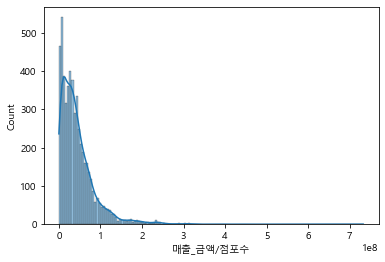

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

sns.histplot(total_df['매출_금액/점포수'], kde = True)
plt.show()

In [203]:
total_df.drop('총_직장_인구_수', axis = 1, inplace =True)

In [14]:
from sklearn.model_selection import train_test_split
total_df.drop('분기당_매출_금액', axis = 1, inplace =True)

features = X = total_df.iloc[ : , 3 : -1]
targets = y = total_df.iloc[ : , -1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = .2, random_state = 156) 

### 왜곡도 확인 후 로그 변환

In [15]:
from scipy.stats import skew

# 숫자형 피처 컬럼 index 
features_index = total_df.dtypes[total_df.dtypes != 'object'].index

# 피처(열)별로 왜곡도 산출
skew_features = total_df[features_index].apply(lambda x : skew(x), axis=0)

# 왜곡도가 1 이상
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

아파트_평균_시가      6.604556
남성_직장_인구_수     6.549622
총_직장_인구_수      6.077429
여성_직장_인구_수     5.677863
집객시설_수         3.778918
매출_금액/점포수      3.162314
점포수            3.079175
월_평균_소득_금액     1.853112
총_생활인구_수       1.825869
폐업_영업_개월_평균    1.093029
dtype: float64


In [16]:
# 피처 로그 변환
import numpy as np
total_df[skew_features_top.index] = np.log1p(total_df[skew_features_top.index])

# 데이터 재분리
features = X = total_df.iloc[ : , 3 : -1]
targets = y = total_df.iloc[ : , -1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = .2) 

In [207]:
features

,월_평균_소득_금액,총_생활인구_수,아파트_평균_시가,운영_영업_개월_평균,폐업_영업_개월_평균,남성_직장_인구_수,여성_직장_인구_수,집객시설_수,점포수
0,15.057902,12.676567,19.505778,144,4.204693,4.804021,5.872118,2.944439,1.945910
1,15.081901,12.897108,19.443358,119,4.094345,5.755742,5.141664,2.772589,1.386294
2,15.124693,12.036464,19.521673,126,4.127134,6.236370,6.208590,2.772589,1.386294
3,15.192748,8.765146,19.579656,116,4.158883,2.833213,2.484907,1.609438,1.386294
4,15.045906,13.934764,19.140928,70,4.025352,5.940171,5.159055,2.484907,2.944439
...,...,...,...,...,...,...,...,...,...
5433,14.672511,10.616780,18.858936,134,4.143135,6.746412,4.454347,2.397895,1.386294
5434,14.922765,14.397313,19.830382,119,4.110874,8.027803,7.928766,4.976734,3.091042
5435,15.099133,14.986456,19.287644,119,4.127134,7.992607,8.038189,5.111988,3.433987
5436,14.616670,15.216636,18.534883,147,4.276666,9.749812,9.666879,5.793014,3.178054


In [149]:
y

0       18.110231
1       17.621678
2       16.735284
3       18.640513
4       17.215260
          ...    
5433    18.995434
5434    17.555096
5435    17.441416
5436    17.235779
5437    17.530565
Name: 매출_금액/점포수, Length: 5438, dtype: float64

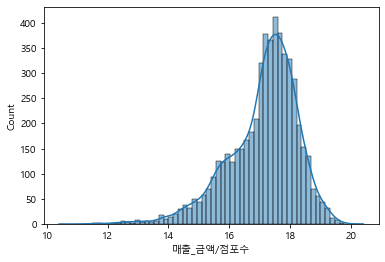

In [170]:
sns.histplot(total_df['매출_금액/점포수'], kde = True)
plt.show()

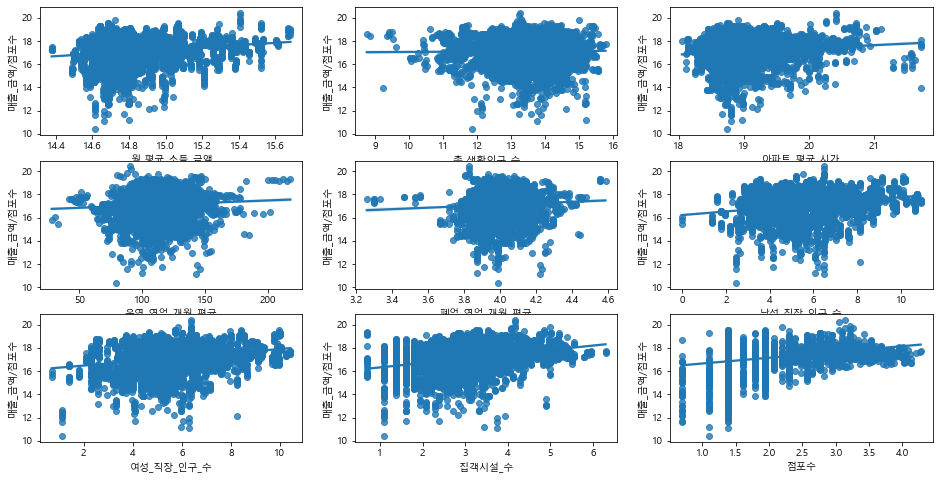

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
fig, axs = plt.subplots(figsize = (16,8), ncols = 3, nrows = 3)
plt.rcParams['font.family'] = 'Malgun Gothic'

lm_features = ['월_평균_소득_금액', '총_생활인구_수', '아파트_평균_시가', '운영_영업_개월_평균', 
               '폐업_영업_개월_평균', '남성_직장_인구_수', '여성_직장_인구_수',
               '집객시설_수', '점포수']

for i, feature in enumerate(lm_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = feature, y = '매출_금액/점포수', data = total_df,
                ax = axs[row][col])

- OLS검정

In [152]:
from sklearn.metrics import mean_squared_error, r2_score
# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('MSE : {0:3f}, RMSE : {1:3f}'.format(mse,rmse))
print('Variance score : {0:3f}'.format(r2_score(y_test, pred)))

MSE : 1.231962, RMSE : 1.109938
Variance score : 0.121976


In [153]:
lr.intercept_ 

12.099409808908456

In [154]:
np.round(lr.coef_, 3)

array([ 0.578, -0.245, -0.239, -0.001,  0.651, -0.025,  0.113,  0.317,
        0.169])

In [155]:
coeff = pd.Series(data = np.round(lr.coef_, 3), index = X.columns)
coeff.sort_values(ascending = False)

폐업_영업_개월_평균    0.651
월_평균_소득_금액     0.578
집객시설_수         0.317
점포수            0.169
여성_직장_인구_수     0.113
운영_영업_개월_평균   -0.001
남성_직장_인구_수    -0.025
아파트_평균_시가     -0.239
총_생활인구_수      -0.245
dtype: float64

In [156]:
# cross_val_score()로 5폴드 세트로 MSE 구한 뒤 이를 기반으로 다시 RMSE를 구함.
neg_mse_scores = cross_val_score(lr, X, y, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

#cross_val_score(scoring = 'neg_mean_squared_error')로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE: {0:3f} '.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-1.21 -1.12 -1.09 -1.2  -1.16]
5 folds의 개별 RMSE scores:  [1.1  1.06 1.04 1.09 1.08]
5 folds의 평균 RMSE: 1.074256 


- 다중공선성 확인

다중공선성 값이 5 이상이면 해당변수가 다른 변수와 상관관계가 높아 변수의 회귀계수 추정을 어렵게 하여 위험하다<br
                                                                 >
->독립적인 중요 피처만 남기고 제거하거나 규제 적용 OR 차원 축소 수행

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
x_data = X

x_data1 = sm.add_constant(x_data, has_constant = "add")

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data1.values, i) for i in range(x_data1.shape[1])]
vif["features"] = x_data1.columns
vif

,VIF Factor,features
0,10797.997246,const
1,2.998722,월_평균_소득_금액
2,1.868530,총_생활인구_수
3,2.392232,아파트_평균_시가
4,1.619232,운영_영업_개월_평균
5,1.582022,폐업_영업_개월_평균
6,802.134936,총_직장_인구_수
7,302.156036,남성_직장_인구_수
8,151.354211,여성_직장_인구_수
9,2.820294,집객시설_수


In [158]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_data = X

x_data1 = sm.add_constant(x_data, has_constant = "add")

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data1.values, i) for i in range(x_data1.shape[1])]
vif["features"] = x_data1.columns
vif

,VIF Factor,features
0,10160.770254,const
1,2.985875,월_평균_소득_금액
2,1.756453,총_생활인구_수
3,2.387003,아파트_평균_시가
4,1.618651,운영_영업_개월_평균
5,1.579308,폐업_영업_개월_평균
6,9.593795,남성_직장_인구_수
7,11.116398,여성_직장_인구_수
8,2.819917,집객시설_수
9,1.846911,점포수


In [210]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, '로그 변환된 RMSE: ', np.round(rmse, 3))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [211]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

features = X = total_df.iloc[ : , 3 : -1]
labels = y = total_df.iloc[ : , -1]
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = .2, random_state = 156) 

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
rid_reg = Ridge()
rid_reg.fit(X_train, y_train)
la_reg = Lasso()
la_reg.fit(X_train, y_train)

models = [lr_reg, rid_reg, la_reg]
get_rmses(models)


LinearRegression 로그 변환된 RMSE:  1.053
Ridge 로그 변환된 RMSE:  1.053
Lasso 로그 변환된 RMSE:  1.14


[1.0529344752230811, 1.0529603972678736, 1.1400820095246846]

In [212]:
def get_top_bottom_coef(model, n=10):
    coef = pd.Series(model.coef_, index = X.columns)
    
    coef_high = coef.sort_values(ascending = False).head(n)
    coef_low = coef.sort_values(ascending = False).tail(n)
    return coef_high, coef_low

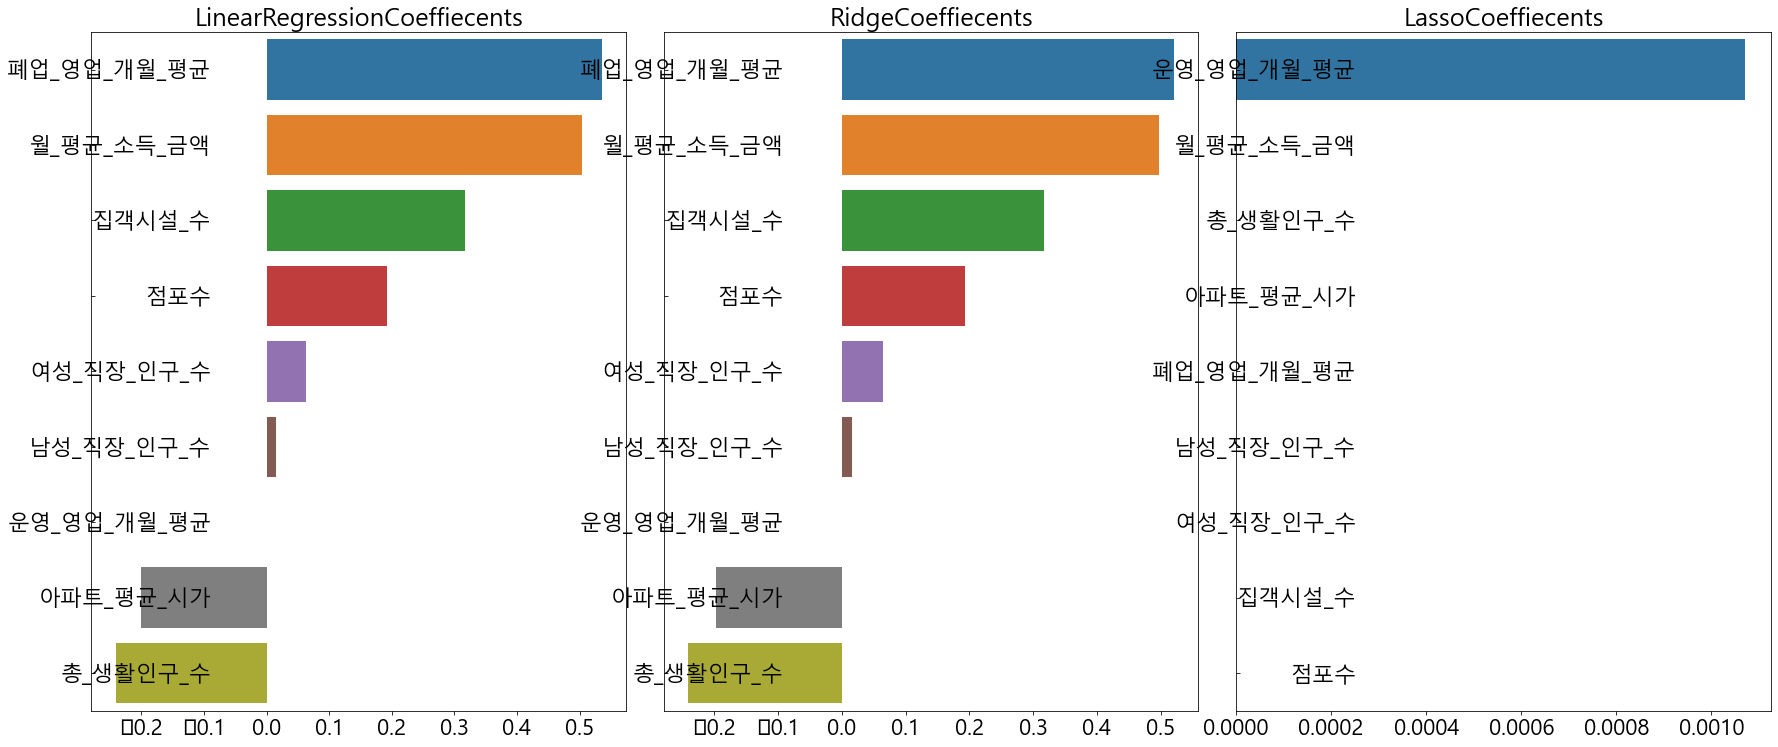

In [213]:
def visualize_coef(models):
    fig, axs = plt.subplots(figsize = (24,10), nrows=1, ncols=3)
    fig.tight_layout()
    
    for i_num, model in enumerate(models):
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        
        axs[i_num].set_title(model.__class__.__name__+'Coeffiecents', size=25)
        axs[i_num].tick_params(axis = 'y', direction = 'in', pad= -120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x = coef_concat.values, y = coef_concat.index, ax = axs[i_num])
models = [lr_reg, rid_reg, la_reg]
visualize_coef(models)

### 베스트 하이퍼 파라미터 산출

In [214]:
from sklearn.model_selection import cross_val_score
def get_avg(models):
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model, X, y, scoring = 'neg_mean_squared_error', cv = 5))
        rmse_avg = np.mean(rmse_list)
        
        print('\n{0} CV RMSE 값 리스트: {1}'.format(model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format(model.__class__.__name__, np.round(rmse_avg, 3)))
        
        
models = [lr_reg, rid_reg, la_reg]
get_avg(models)                            


LinearRegression CV RMSE 값 리스트: [1.101 1.059 1.042 1.095 1.075]
LinearRegression CV 평균 RMSE 값: 1.074

Ridge CV RMSE 값 리스트: [1.101 1.059 1.042 1.095 1.075]
Ridge CV 평균 RMSE 값: 1.074

Lasso CV RMSE 값 리스트: [1.183 1.148 1.127 1.181 1.156]
Lasso CV 평균 RMSE 값: 1.159


In [215]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid = params,
                              scoring = 'neg_mean_squared_error', cv = 5)
    grid_model.fit(X, y)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha: {2}'.format(model.__class__.__name__,
                                                               np.round(rmse, 4), grid_model.best_params_))

ridge_params = {'alpha':[0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
print_best_params(rid_reg, ridge_params)
print_best_params(la_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 1.0745, 최적 alpha: {'alpha': 5}
Lasso 5 CV 시 최적 평균 RMSE 값: 1.0745, 최적 alpha: {'alpha': 0.001}


LinearRegression 로그 변환된 RMSE:  1.053
Ridge 로그 변환된 RMSE:  1.053
Lasso 로그 변환된 RMSE:  1.053


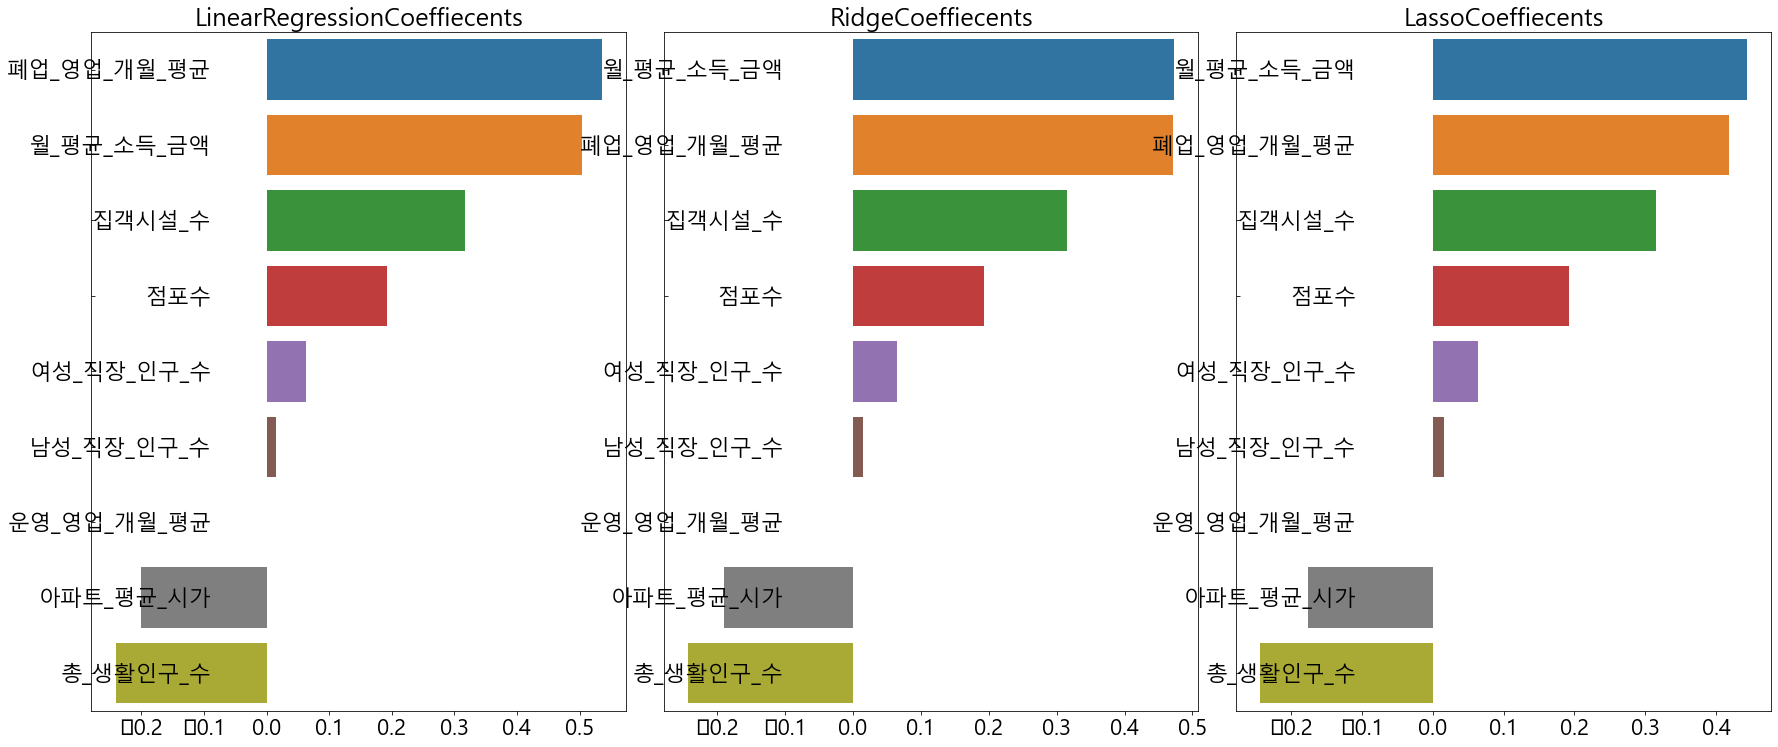

In [216]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
rid_reg = Ridge(alpha =5)
rid_reg.fit(X_train, y_train)
la_reg = Lasso(alpha = 0.001)
la_reg.fit(X_train, y_train)

models = [lr_reg, rid_reg, la_reg]
get_rmses(models)

models = [lr_reg, rid_reg, la_reg]
visualize_coef(models)

- 최종 예측

In [217]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test, pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))
    
rid_reg = Ridge(alpha =5)
rid_reg.fit(X_train, y_train)
la_reg = Lasso(alpha = 0.001)
la_reg.fit(X_train, y_train)

ridge_pred = rid_reg.predict(X_test)
lasso_pred = la_reg.predict(X_test)

pred = 0.4*ridge_pred + 0.6*lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}

get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 1.053165782796797
Ridge 모델의 RMSE: 1.0530766736570305
Lasso 모델의 RMSE: 1.0532345446965694


In [218]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

xgb_reg = XGBRegressor(learning_rate = 0.05, colsample_bytree = 0.5, subsample = 0.8)
lgbm_reg = LGBMRegressor(learning_rate = 0.05, num_leaves = 4, colsample_bytree = 0.4, subsample = 0.6, reg_lambda = 10, n_jobs = -1)

xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)

xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5*xgb_pred + 0.5*lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}

get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.8861087240998387
XGBM 모델의 RMSE: 0.7890732734765349
LGBM 모델의 RMSE: 1.0010700455098613


In [221]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_Datasets(model, X_train_n, y_train_n, X_test_n,  n_folds):
    kf = KFold(n_splits=n_folds, shuffle=False)
    
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, 'model 시작')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        
        model.fit(X_tr, y_tr)
        
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        test_pred[:, folder_counter] = model.predict(X_test_n)
        
    test_pred_mean = np.mean(test_pred, axis = 1).reshape(-1,1)
    return train_fold_pred, test_pred_mean

In [222]:
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

ridge_train, ridge_test = get_stacking_base_Datasets(rid_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_Datasets(la_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_Datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_Datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge model 시작
Lasso model 시작
XGBRegressor model 시작
LGBMRegressor model 시작


In [224]:
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis = 1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis = 1)

meta_model_lasso = Lasso(alpha = 0.001)

meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)

print('스태킹 회귀 모델의 최종 RMSE 값: ', rmse)

스태킹 회귀 모델의 최종 RMSE 값:  0.619331643475732


### 이상치 제거

In [201]:
total_dff

,기준_년_코드,기준_분기_코드,상권_코드,월_평균_소득_금액,총_생활인구_수,아파트_평균_시가,운영_영업_개월_평균,폐업_영업_개월_평균,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,집객시설_수,분기당_매출_금액,점포수,매출_금액/점포수
0,2021,4,2110002,3463885.0,320156,295972850,144,66,475,121,354,18,4.398702e+08,6,7.331170e+07
1,2021,4,2110003,3548020.0,399155,278062827,119,59,485,315,170,15,1.349331e+08,3,4.497771e+07
2,2021,4,2110005,3703145.0,168798,300714862,126,61,1006,510,496,15,5.561126e+07,3,1.853709e+07
3,2021,4,2110006,3963935.0,6406,318666667,116,63,27,16,11,4,3.737604e+08,3,1.245868e+08
4,2021,4,2110008,3422580.0,1126654,205494163,70,55,552,379,173,11,5.392189e+08,18,2.995661e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5433,2020,1,2130326,2356081.0,40813,155000000,134,62,935,850,85,10,5.330078e+08,3,1.776693e+08
5434,2020,1,1001491,3026037.0,1789259,409473123,119,60,5839,3064,2775,144,8.836913e+08,21,4.208054e+07
5435,2020,1,1001493,3609691.0,3225040,237967427,119,61,6054,2958,3096,165,1.126762e+09,30,3.755873e+07
5436,2020,1,1001494,2228122.0,4059764,112097903,147,71,32935,17150,15785,327,7.032851e+08,23,3.057761e+07


In [210]:
total_df_log = total_df.copy()

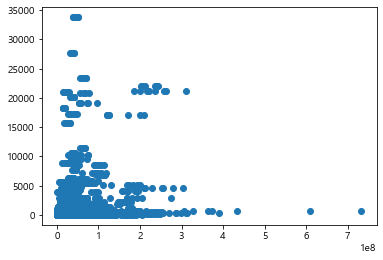

In [202]:
plt.scatter(y = total_dff['여성_직장_인구_수'],x = total_dff['매출_금액/점포수'])
plt.show()

In [225]:
cond1 = total_df_log['여성_직장_인구_수'] > np.log1p(25000)
cond2 = total_df_log['매출_금액/점포수'] < np.log1p(300000000)
outlier_index = total_df_log[cond1&cond2].index

print('이상치 레코드 index: ', outlier_index.values)
print('이상치 삭제 전 total_df shape: ', total_df_log.shape)

total_df_log.drop(outlier_index, axis = 0, inplace = True)
print('이상치 삭제 후 total_df shape: ', total_df_log.shape)

이상치 레코드 index:  []
이상치 삭제 전 total_df shape:  (5422, 14)
이상치 삭제 후 total_df shape:  (5422, 14)


In [226]:
from scipy.stats import skew

# 숫자형 피처 컬럼 index 
features_index = total_df_log.dtypes[total_df_log.dtypes != 'object'].index

# 피처(열)별로 왜곡도 산출
skew_features = total_df_log[features_index].apply(lambda x : skew(x), axis=0)

# 왜곡도가 1 이상
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

아파트_평균_시가     1.384523
월_평균_소득_금액    1.167023
dtype: float64


In [227]:
# 피처 로그 변환
total_df_log[skew_features_top.index] = np.log1p(total_df_log[skew_features_top.index])

# 데이터 재분리
features = X = total_df_log.iloc[ : , 3 : -1]
targets = y = total_df_log.iloc[ : , -1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = .2) 

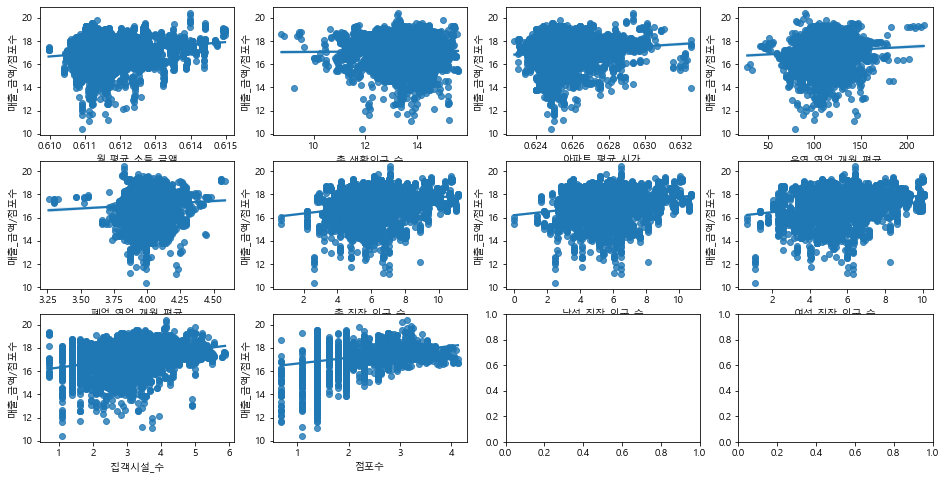

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
fig, axs = plt.subplots(figsize = (16,8), ncols = 4, nrows = 3)
plt.rcParams['font.family'] = 'Malgun Gothic'

lm_features = ['월_평균_소득_금액', '총_생활인구_수', '아파트_평균_시가', '운영_영업_개월_평균', 
               '폐업_영업_개월_평균', '총_직장_인구_수', '남성_직장_인구_수', '여성_직장_인구_수',
               '집객시설_수', '점포수']

for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x = feature, y = '매출_금액/점포수', data = total_df_log,
                ax = axs[row][col])

In [232]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid = params,
                              scoring = 'neg_mean_squared_error', cv = 5)
    grid_model.fit(X, y)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha: {2}'.format(model.__class__.__name__,
                                                               np.round(rmse, 4), grid_model.best_params_))

ridge_params = {'alpha':[0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
print_best_params(rid_reg, ridge_params)
print_best_params(la_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 1.0763, 최적 alpha: {'alpha': 0.05}
Lasso 5 CV 시 최적 평균 RMSE 값: 1.0767, 최적 alpha: {'alpha': 0.001}


LinearRegression 로그 변환된 RMSE:  1.059
Ridge 로그 변환된 RMSE:  1.064
Lasso 로그 변환된 RMSE:  1.064


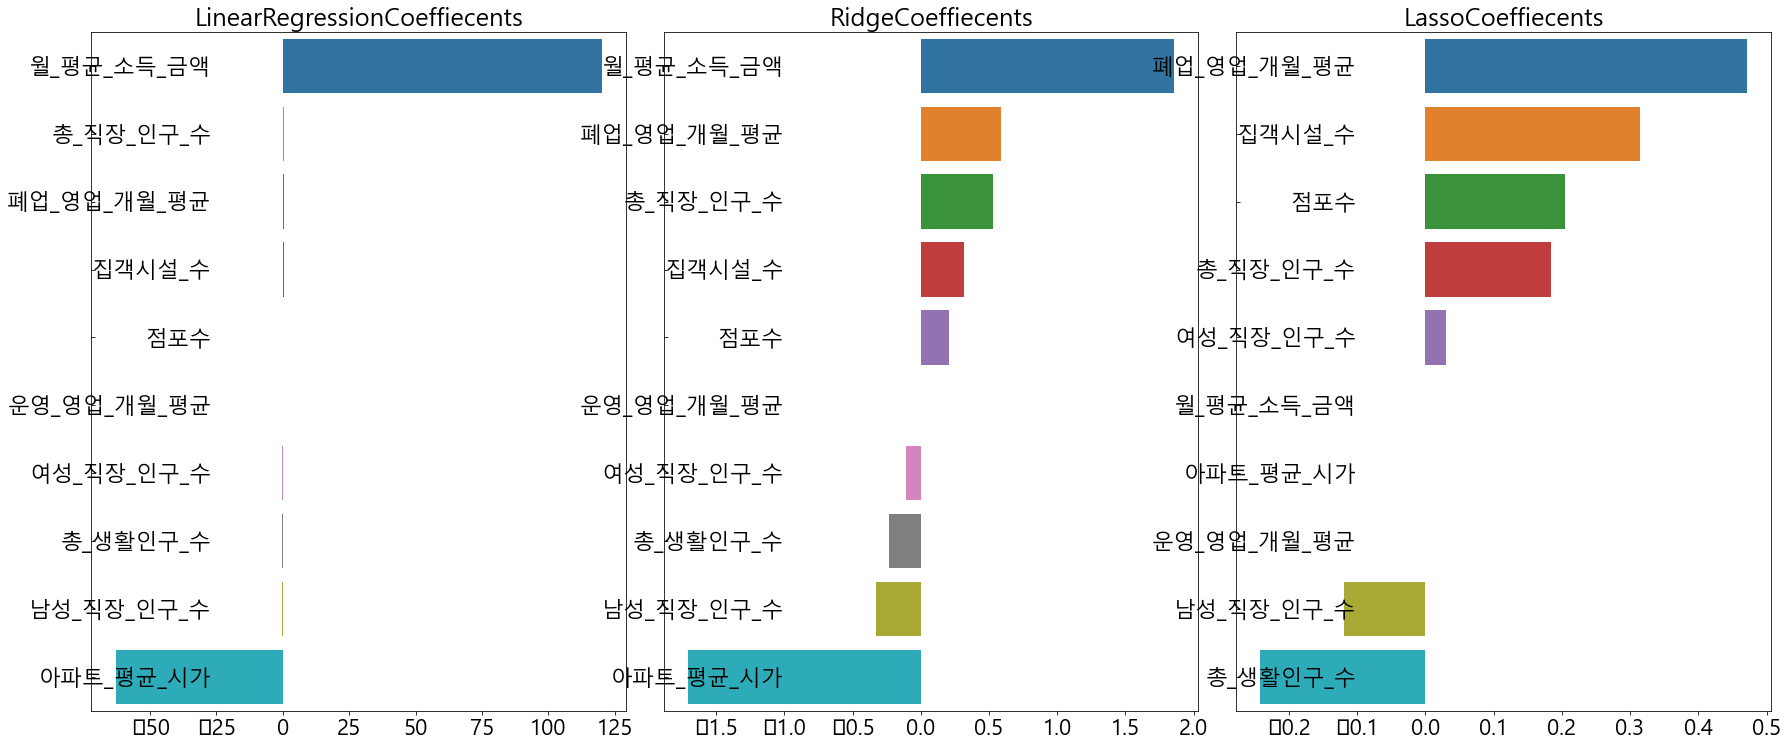

In [233]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
rid_reg = Ridge(alpha = 0.05)
rid_reg.fit(X_train, y_train)
la_reg = Lasso(alpha = 0.001)
la_reg.fit(X_train, y_train)

models = [lr_reg, rid_reg, la_reg]
get_rmses(models)

models = [lr_reg, rid_reg, la_reg]
visualize_coef(models)

### 차원축소

<AxesSubplot:>

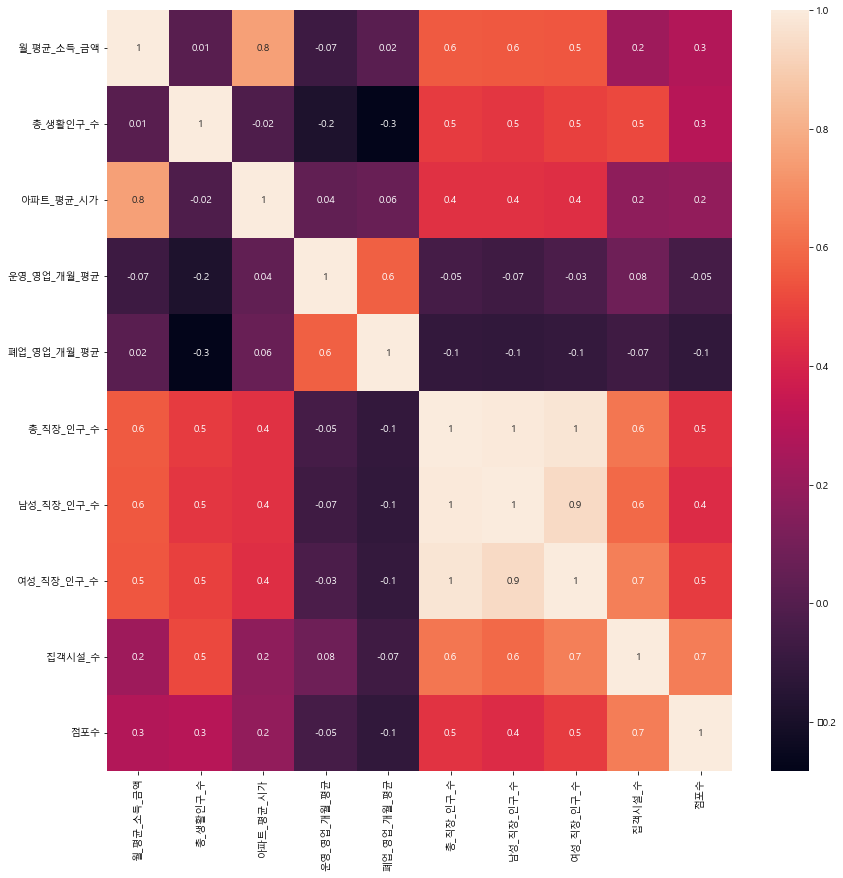

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X.corr()
plt.figure(figsize = (14,14))
sns.heatmap(corr, annot = True, fmt='.1g')

In [167]:
X[cols_bill].corr()

,남성_직장_인구_수,여성_직장_인구_수
남성_직장_인구_수,1.000000,0.944341
여성_직장_인구_수,0.944341,1.000000


In [185]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_bill = ['남성_직장_인구_수','여성_직장_인구_수']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[cols_bill])

pca = PCA(n_components=1)
X_pca = pca.fit(X_scaled)
pca.explained_variance_ratio_

array([0.9721706])

In [190]:
rcf = RandomForestClassifier(random_state = 156)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)
cross_val_score(rcf, df_pca, y, scoring = 'accuracy', cv = 5)

array([nan, nan, nan, nan, nan])

In [191]:
df_pca

array([[-0.20326345,  2.95453492, -0.53122983],
       [-0.27222791,  1.70014215,  0.78857674],
       [ 0.16693738,  2.58630659,  0.81660674],
       ...,
       [ 4.04021736,  0.39994476, -1.70731584],
       [ 4.39427768,  0.53183891, -4.88283662],
       [ 6.14801423,  0.15455625, -0.06928696]])